In [3]:
import pandas as pd 
import datetime
from stockai import Stock
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr

%matplotlib inline

In [21]:
ticker = 'TSLA'

# Download historical data for required stocks (5 years)
ohlcv = pdr.get_data_yahoo(ticker, datetime.date.today() - datetime.timedelta(1825), datetime.date.today())

ohlcv.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-01,39.189999,36.540001,38.849998,37.270000,33561000.0,37.270000
2016-03-02,37.703999,36.299999,36.745998,37.667999,24312000.0,37.667999
2016-03-03,39.484001,36.844002,37.655998,39.147999,24145000.0,39.147999
2016-03-04,40.806000,39.500000,39.599998,40.208000,32445500.0,40.208000
2016-03-07,41.939999,39.480000,39.535999,41.057999,26647000.0,41.057999


In [28]:
# Calculate MACD function - Moving Average Convergence Divergence
def MACD(DF, fast_span, slow_span, signal_span):
    df = DF.copy()
    # Calculate MACD
    df['MA_FAST'] = df['Adj Close'].ewm(span=fast_span, min_periods=fast_span).mean()
    df['MA_SLOW'] = df['Adj Close'].ewm(span=slow_span, min_periods=slow_span).mean()
    df['MACD'] = df['MA_FAST'] - df['MA_SLOW']
    df['Signal'] = df['MACD'].ewm(span=signal_span,min_periods=signal_span).mean()

    df.dropna(inplace=True)
    
    return df

In [30]:
df = MACD(ohlcv, 12, 26, 9)

df.head(100)

,High,Low,Open,Close,Volume,Adj Close,MA_FAST,MA_SLOW,MACD,Signal
Date,,,,,,,,,,
2016-04-18,51.661999,50.332001,50.445999,50.776001,21357000.0,50.776001,49.855185,48.366701,1.488484,1.576412
2016-04-19,50.874001,48.250000,50.624001,49.473999,31787500.0,49.473999,49.796371,48.454673,1.341698,1.523823
2016-04-20,50.731998,48.299999,49.251999,49.993999,25970500.0,49.993999,49.826850,48.576315,1.250535,1.464029
2016-04-21,50.180000,49.382000,49.798000,49.658001,13915500.0,49.658001,49.800820,48.661372,1.139448,1.394322
2016-04-22,50.799999,49.141998,49.778000,50.750000,18931500.0,50.750000,49.947103,48.824863,1.122240,1.336740
...,...,...,...,...,...,...,...,...,...,...
2016-08-31,42.520000,41.730000,42.085999,42.402000,16382500.0,42.402000,43.837701,44.338142,-0.500441,-0.160866
2016-09-01,42.220001,40.099998,41.801998,40.153999,39715500.0,40.153999,43.270978,44.028192,-0.757214,-0.280136
2016-09-02,40.639999,39.240002,40.466000,39.556000,29887000.0,39.556000,42.699443,43.696904,-0.997462,-0.423601


<AxesSubplot:xlabel='Date'>

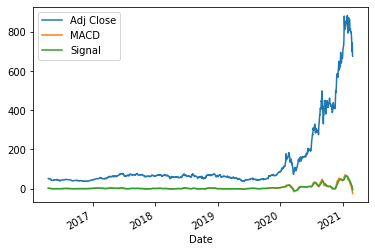

In [31]:
# Plot Adj Close, MACD & Signal
df.iloc[:,[5,8,9]].plot()